In [57]:
import pymongo as pymg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm

In [2]:
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["aggie"]
reports = mydb["reports_backup"]


In [ ]:
incident_iter = incidents.find({"_sourceNicknames": "Hate Terms"})
incident_arr = []
for x in incident_iter:
  incident_arr.append(x)

df_1 = pd.DataFrame(incident_arr)

In [86]:
# df_1.to_csv('./incidents.csv')

In [90]:
df_1.head()

""


In [43]:
def f(x):
    x = x.lower()
    if "hate" in x:
        return "Hate Speech"
    elif "false" in x:
        return "False Information"
    
df_1['title'] = (df_1['title']
              .map(lambda x: f(x)))

Text(0.5, 0, 'tags')

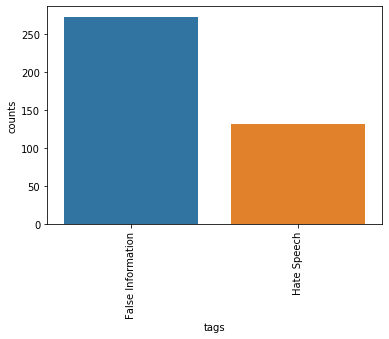

In [44]:
# sns.set_theme(style="whitegrid")

counts = df_1.title.value_counts()
counts.sort_index(inplace=True)
incident_plot = sns.barplot(x = counts.index, y = counts)
plt.setp(incident_plot.get_xticklabels(), rotation=90)
plt.ylabel('counts')
plt.xlabel('tags')


In [59]:
df_hate = df_1.loc[df_1['title'] == "Hate Speech"]
df_hate = df_hate[df_hate['locationName'].notnull()]

In [63]:
def loc_f(x):
    if "twitter" in x:
        return "Twitter"
    elif "facebook" in x and "groups" in x:
        return "Facebook Groups"
    elif "facebook" in x:
        return "Facebook Others"
    else:
        return "Others"

df_hate['locationType'] = (df_hate['locationName']
              .map(lambda x: loc_f(x)))

Text(0.5, 0, 'location')

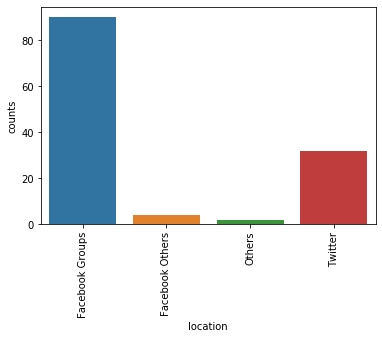

In [64]:
counts = df_hate.locationType.value_counts()
counts.sort_index(inplace=True)
location_plot = sns.barplot(x = counts.index, y = counts)
plt.setp(location_plot.get_xticklabels(), rotation=90)
plt.ylabel('counts')
plt.xlabel('location')


In [85]:
df_hate['locationName'][411]

'https://www.facebook.com/groups/3723094891049277/permalink/5810035965688482'

In [72]:
def group_f(x):
    if "facebook" in x and "groups" in x:
        return x[0: x.index('/permalink')]
    else:
        return "None"

df_hate['locationGroup'] = (df_hate['locationName']
              .map(lambda x: group_f(x)))

In [75]:
group_array = df_hate['locationGroup'].to_numpy()

In [77]:
group_array = np.unique(group_array)
group_array = group_array[1:]

In [80]:
# List of known facebook groups with hate speech
group_array

array(['https://www.facebook.com/groups/1172065759612115',
       'https://www.facebook.com/groups/1262594190798402',
       'https://www.facebook.com/groups/1417947225172790',
       'https://www.facebook.com/groups/142664326600242',
       'https://www.facebook.com/groups/148095576030610',
       'https://www.facebook.com/groups/194048064264640',
       'https://www.facebook.com/groups/1952894094723845',
       'https://www.facebook.com/groups/2113173488738433',
       'https://www.facebook.com/groups/2329039460459271',
       'https://www.facebook.com/groups/2382743992041985',
       'https://www.facebook.com/groups/2449454538432782',
       'https://www.facebook.com/groups/2481025542153063',
       'https://www.facebook.com/groups/251289802117751',
       'https://www.facebook.com/groups/2529920990386884',
       'https://www.facebook.com/groups/3723094891049277',
       'https://www.facebook.com/groups/395512074396480',
       'https://www.facebook.com/groups/421066625503806',
   

In [89]:
hate_terms_amharic = ['ጋላ', 'መናፍቅ', 'ፈላሻ', 'ቡሽቲ', 'ሰፋሪ', 'የአህያ ዘር', 'ቂጥ አጣቢ', 'ትምክህተኛ', 'ከብት', 'ወያኔ', 'ርዝራዦች', 'መንጋ', 'ቆማጣ', 'ባንዳ', 'ዲቃላ', 'አህባሽ', 'ወሀብይ', 'አህዛብ', 'መንጋ', 'ትምከተኛ፣', 'ነፍጠኛ', 'ጠባብ', 'መጤ', 'ወሃቢይ', 'ሻንቅላ', 'ሸርሙጣ', 'አጋሜ']
hate_terms_amharic_eng = ['galla', 'menafeq', 'felasha', 'bushti', 'sefari', 'yeahya zer', 'qit atabi', 'timkehetegna', 'kebt', 'woyane', 'rizrazoch', 'menga', 'komata', 'banda', 'dikala', 'ahbash', 'wehabiy', 'ahizab', 'menga', 'timketagna', 'nefit\'enya', 't\'ebabi', 'met\'ē', 'wehabīyi', 'shanik\'ila', 'sherimut\'a', 'agame']
hate_terms_oromo = ['nafxanya', 'habasha', 'bushtii', 'qomcee', 'ganttu', 'gantuu', 'woyyanee', 'qomaaxaa', 'qurcii', 'saroota', 'abba gara', 'ergamtuu', 'harroota', 'hattu', 'sharmuuxa', 'muxee haadha', 'diqaala', 'shallee', 'maxantuu', 'nafxanyaa']

In [7]:
incident = []
count_incident = []
for terms in hate_terms_amharic:
    reports_iter = reports.find({"content": {"$regex": terms}})
    count_incident.append(reports_iter.count())
    for x in reports_iter:
        incident.append(x)
df_1 = pd.DataFrame(incident)
df_1.head()

/home/ckmj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """


,_id,tags,read,flagged,_sources,_media,_sourceNicknames,authoredAt,fetchedAt,content,author,metadata,url,storedAt,__v,checkedOutAt,checkedOutBy,_incident,smtcTags
0,5f490bf511d31aadc7002b28,[Amharic Media Pages],False,False,[5f3ad3bbe67c3e63b4ddf51c],[crowdtangle],[card-ct],2020-08-28 09:30:25,2020-08-28 13:51:48.905,የአሥራት ጋዜጠኞች ተጨማሪ ቀጠሮ ተሰጠባቸው አሥራት:_ነሃሴ 22/2012 ...,ASRAT MEDIA HOUSE,"{'sponsor': None, 'caption': None, 'descriptio...",https://www.facebook.com/ASRATMEDIAHOUSE/posts...,2020-08-28 13:51:49.035,0,NaN,NaN,NaN,NaN
1,5f4911f411d31aadc7002cff,[Amharic Media Pages],False,False,[5f3ad3bbe67c3e63b4ddf51c],[crowdtangle],[card-ct],2020-08-27 12:07:59,2020-08-28 14:17:24.088,በኦሮሚያ ክልል ከ12 ሺህ በላይ ሰዎች በጎርፍ ምክንያት መፈናቀላቸው ተገ...,FBC (Fana Broadcasting Corporate S.C.),"{'sponsor': None, 'caption': None, 'descriptio...",https://www.facebook.com/fanabroadcasting/post...,2020-08-28 14:17:24.114,0,NaN,NaN,NaN,NaN
2,5f491f2111d31aadc700317d,[Amharic Media Pages],False,False,[5f3ad3bbe67c3e63b4ddf51c],[crowdtangle],[card-ct],2020-08-25 15:19:05,2020-08-28 15:13:37.226,መካከለኛ እና አነስተኛ ኩባንያዎች ላይ ያነጣጠረ የሳይበር ጥቃት ዘመቻ ተ...,FBC (Fana Broadcasting Corporate S.C.),"{'sponsor': None, 'caption': None, 'descriptio...",https://www.facebook.com/fanabroadcasting/post...,2020-08-28 15:13:37.305,0,NaN,NaN,NaN,NaN
3,5f491f2111d31aadc7003183,[Amharic Media Pages],False,False,[5f3ad3bbe67c3e63b4ddf51c],[crowdtangle],[card-ct],2020-08-25 15:27:41,2020-08-28 15:13:37.226,በነሐሴ የመጀመሪያ አጋማሽ ቀናት ከ256 ሺህ በላይ ሰዎች የኮሮና ቫይረስ...,Ethiopian News Agency,"{'sponsor': None, 'caption': None, 'descriptio...",https://www.facebook.com/ethiopianewsagency/po...,2020-08-28 15:13:37.327,0,NaN,NaN,NaN,NaN
4,5f491f2111d31aadc700318b,[Amharic Media Pages],False,False,[5f3ad3bbe67c3e63b4ddf51c],[crowdtangle],[card-ct],2020-08-25 15:40:44,2020-08-28 15:13:37.226,በነሐሴ የመጀመሪያ አጋማሽ ቀናት ከ256 ሺህ በላይ ሰዎች የኮሮና ቫይረስ...,FBC (Fana Broadcasting Corporate S.C.),"{'sponsor': None, 'caption': None, 'descriptio...",https://www.facebook.com/fanabroadcasting/post...,2020-08-28 15:13:37.354,0,NaN,NaN,NaN,NaN


In [90]:
print(np.sum(count_incident))

6966


In [9]:
df_1 = df_1.drop_duplicates(subset=['_id'])

In [10]:
df_1

,_id,tags,read,flagged,_sources,_media,_sourceNicknames,authoredAt,fetchedAt,content,author,metadata,url,storedAt,__v,checkedOutAt,checkedOutBy,_incident,smtcTags
0,5f490bf511d31aadc7002b28,[Amharic Media Pages],False,False,[5f3ad3bbe67c3e63b4ddf51c],[crowdtangle],[card-ct],2020-08-28 09:30:25,2020-08-28 13:51:48.905,የአሥራት ጋዜጠኞች ተጨማሪ ቀጠሮ ተሰጠባቸው አሥራት:_ነሃሴ 22/2012 ...,ASRAT MEDIA HOUSE,"{'sponsor': None, 'caption': None, 'descriptio...",https://www.facebook.com/ASRATMEDIAHOUSE/posts...,2020-08-28 13:51:49.035,0,NaN,NaN,NaN,NaN
1,5f4911f411d31aadc7002cff,[Amharic Media Pages],False,False,[5f3ad3bbe67c3e63b4ddf51c],[crowdtangle],[card-ct],2020-08-27 12:07:59,2020-08-28 14:17:24.088,በኦሮሚያ ክልል ከ12 ሺህ በላይ ሰዎች በጎርፍ ምክንያት መፈናቀላቸው ተገ...,FBC (Fana Broadcasting Corporate S.C.),"{'sponsor': None, 'caption': None, 'descriptio...",https://www.facebook.com/fanabroadcasting/post...,2020-08-28 14:17:24.114,0,NaN,NaN,NaN,NaN
2,5f491f2111d31aadc700317d,[Amharic Media Pages],False,False,[5f3ad3bbe67c3e63b4ddf51c],[crowdtangle],[card-ct],2020-08-25 15:19:05,2020-08-28 15:13:37.226,መካከለኛ እና አነስተኛ ኩባንያዎች ላይ ያነጣጠረ የሳይበር ጥቃት ዘመቻ ተ...,FBC (Fana Broadcasting Corporate S.C.),"{'sponsor': None, 'caption': None, 'descriptio...",https://www.facebook.com/fanabroadcasting/post...,2020-08-28 15:13:37.305,0,NaN,NaN,NaN,NaN
3,5f491f2111d31aadc7003183,[Amharic Media Pages],False,False,[5f3ad3bbe67c3e63b4ddf51c],[crowdtangle],[card-ct],2020-08-25 15:27:41,2020-08-28 15:13:37.226,በነሐሴ የመጀመሪያ አጋማሽ ቀናት ከ256 ሺህ በላይ ሰዎች የኮሮና ቫይረስ...,Ethiopian News Agency,"{'sponsor': None, 'caption': None, 'descriptio...",https://www.facebook.com/ethiopianewsagency/po...,2020-08-28 15:13:37.327,0,NaN,NaN,NaN,NaN
4,5f491f2111d31aadc700318b,[Amharic Media Pages],False,False,[5f3ad3bbe67c3e63b4ddf51c],[crowdtangle],[card-ct],2020-08-25 15:40:44,2020-08-28 15:13:37.226,በነሐሴ የመጀመሪያ አጋማሽ ቀናት ከ256 ሺህ በላይ ሰዎች የኮሮና ቫይረስ...,FBC (Fana Broadcasting Corporate S.C.),"{'sponsor': None, 'caption': None, 'descriptio...",https://www.facebook.com/fanabroadcasting/post...,2020-08-28 15:13:37.354,0,NaN,NaN,NaN,NaN
5,5f491f2111d31aadc70031ab,[Amharic Media Pages],False,False,[5f3ad3bbe67c3e63b4ddf51c],[crowdtangle],[card-ct],2020-08-25 16:19:51,2020-08-28 15:13:37.226,በኢትዮጵያ በ15 ቀናት ውስጥ ከ256 ሺህ በላይ ሰዎች የኮሮና ምርመራ እ...,Ethiopian Broadcasting Corporation,"{'sponsor': None, 'caption': None, 'descriptio...",https://www.facebook.com/EBCzena/posts/3612833...,2020-08-28 15:13:37.433,0,NaN,NaN,NaN,NaN
6,5f4911f411d31aadc7002d44,[Amharic Media Pages],False,False,[5f3ad3bbe67c3e63b4ddf51c],[crowdtangle],[card-ct],2020-08-27 14:07:12,2020-08-28 14:17:24.088,በምሥራቅ አፍሪካ ረሃብና የተመጣጠነ ምግብ እጥረት እንዳያጋጥም የዓለም ም...,Ethiopian News Agency,"{'sponsor': None, 'caption': None, 'descriptio...",https://www.facebook.com/ethiopianewsagency/po...,2020-08-28 14:17:24.338,0,NaN,NaN,NaN,NaN
7,5f49203311d31aadc70031f5,[Amharic Media Pages],False,False,[5f3ad3bbe67c3e63b4ddf51c],[crowdtangle],[card-ct],2020-08-25 13:19:22,2020-08-28 15:18:11.781,በቀጣይ ዓመት የትምህርት ዘመን ተማሪዎች ለኮሮና ተጋላጭ እንዳይሆኑ ዝግጅ...,FBC (Fana Broadcasting Corporate S.C.),"{'sponsor': None, 'caption': None, 'descriptio...",https://www.facebook.com/fanabroadcasting/post...,2020-08-28 15:18:11.960,0,NaN,NaN,NaN,NaN
8,5f49216211d31aadc7003257,[Amharic Media Pages],False,False,[5f3ad3bbe67c3e63b4ddf51c],[crowdtangle],[card-ct],2020-08-25 10:41:03,2020-08-28 15:23:14.865,በቀጣይ ዓመት የትምህርት ዘመን ተማሪዎች ለኮሮና ተጋላጭ እንዳይሆኑ ዝግጅ...,Ethiopian Broadcasting Corporation,"{'sponsor': None, 'caption': None, 'descriptio...",https://www.facebook.com/EBCzena/posts/3612016...,2020-08-28 15:23:14.985,0,NaN,NaN,NaN,NaN
9,5f49216311d31aadc7003283,[Political Parties],False,False,[5f3ad3bbe67c3e63b4ddf51c],[crowdtangle],[card-ct],2020-08-25 11:54:06,2020-08-28 15:23:14.865,ለኢፌዴሪ ጠ/ሚኒስትር ዶ/ር አብይ አህመድ አዲስ አበባ ጉዳዩ፤- አቤቱታ ...,የኢትዮጵያውያን ዴሞክራሲያዊ ፓርቲ/ Ethiopian Democratic Party,"{'sponsor': None, 'caption': None, 'descriptio...",https://www.facebook.com/ethiopiandemocraticpa...,2020-08-28 15:23:15.131,0,NaN,NaN,NaN,NaN


In [92]:
count_incident = []
for term in hate_terms_amharic:
    N, D = df_1[df_1['content'].str.contains(term)].shape
    count_incident.append(N)

In [11]:
df_1.to_csv('hate_samples.csv', index=False)

In [97]:
prop = FontProperties(fname="./jiret.ttf")
print(count_incident)
print(np.sum(count_incident))
print(df_1.shape)

[661, 7, 10, 7, 68, 0, 1, 27, 108, 2140, 103, 936, 20, 596, 24, 0, 0, 10, 936, 0, 418, 205, 69, 0, 6, 9, 9]
6370
(5054, 19)


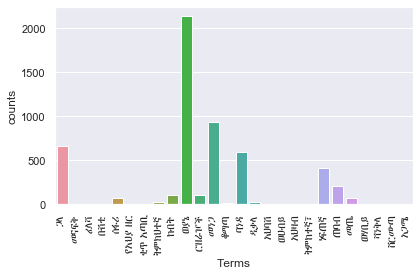

In [106]:
# sns.set(font="Loma")
term_plot = sns.barplot(x = hate_terms_amharic, y = count_incident)
plt.setp(term_plot.get_xticklabels(), rotation=90, fontproperties=prop)
plt.xlabel('Terms')
plt.ylabel('counts')
plt.tight_layout()
plt.savefig('./figures/term_count.png', dpi=200)

